In [ ]:
from google.colab import files
uploaded = files.upload()


Saving daily_weather.csv to daily_weather.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('daily_weather.csv')
df.head(3)


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000


In [ ]:
df = df.drop(['number'], axis=1, errors='ignore')
df = df.dropna()

df.rename(columns={'air_temp_9am': 'Temperature'}, inplace=True)


In [ ]:
X = df[['index']]
y = df['Temperature']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 141.15


In [ ]:

future_index = 5000
future_temp = model.predict([[future_index]])
print(f"Predicted Temperature on day {future_index}: {future_temp[0]:.2f} °C")


Predicted Temperature on day 5000: 71.46 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


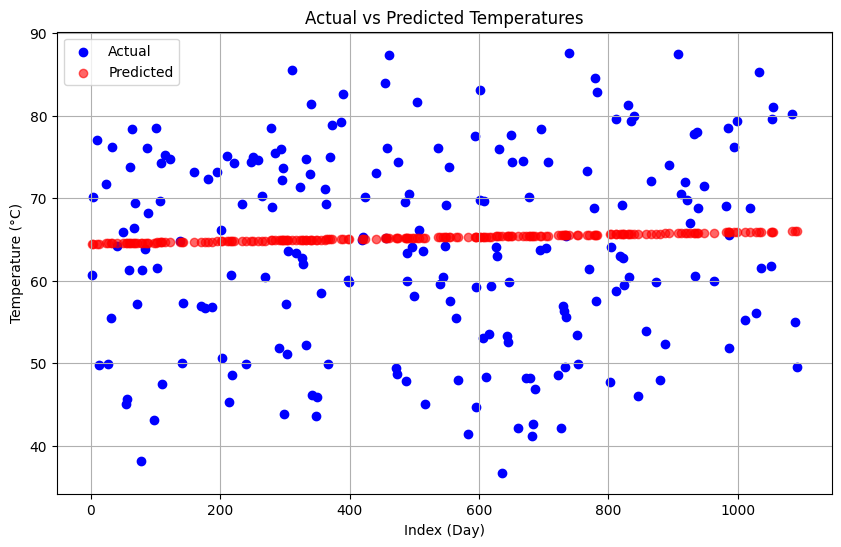

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Index (Day)')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()


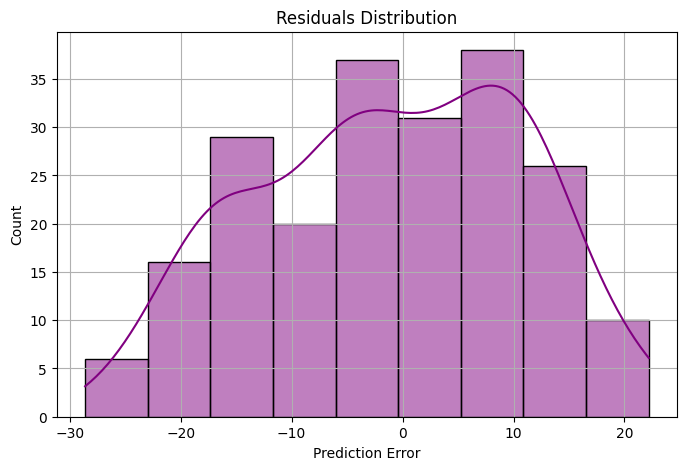

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error')
plt.grid(True)
plt.show()
